In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
#import data
df = pd.read_csv('6_23_2020.csv') 
df.head()

,Plot,Year,Date,Red,Green,Blue,BI,GLI,NGRDI,VARI,...,ExR,ExB,ExGR,MGRVI,RGBVI,GRRI,VEG,Range,Row,Mean.Yld.bu.ac
0,Plot1,2020,6232020,55.994,80.569,48.344,63.150176,0.213955,0.179954,0.278568,...,-0.011776,-0.069697,56.811776,0.348618,0.411421,1.438886,1.511025,67,1,178.076035
1,Plot10,2020,6232020,49.068,75.690,43.456,57.807349,0.241308,0.213389,0.327446,...,-0.041583,-0.088290,58.897583,0.408191,0.457518,1.542553,1.606222,67,10,218.098259
2,Plot100,2020,6232020,50.407,75.093,42.386,57.666852,0.236206,0.196701,0.297014,...,-0.026942,-0.093829,57.419942,0.378748,0.450441,1.489734,1.578240,63,20,219.528599
3,Plot1000,2020,6232020,31.622,49.728,28.543,37.804443,0.246152,0.222569,0.342871,...,-0.049659,-0.088885,39.340659,0.424128,0.465207,1.572576,1.627147,18,20,234.371344
4,Plot1001,2020,6232020,34.622,53.089,29.653,40.399774,0.245833,0.210544,0.318078,...,-0.039349,-0.098623,41.942349,0.403214,0.465996,1.533389,1.614573,17,1,158.580044


In [18]:
#create 16 datasets
red_mean_cols = df[['Red', 'Mean.Yld.bu.ac']]
green_mean_cols = df[['Green', 'Mean.Yld.bu.ac']]
blue_mean_cols = df[['Blue', 'Mean.Yld.bu.ac']]
bi_mean_cols = df[['BI', 'Mean.Yld.bu.ac']]
gli_mean_cols = df[['GLI', 'Mean.Yld.bu.ac']]
ngrdi_mean_cols = df[['NGRDI', 'Mean.Yld.bu.ac']]
vari_mean_cols = df[['VARI', 'Mean.Yld.bu.ac']]
bgi_mean_cols = df[['BGI', 'Mean.Yld.bu.ac']]
exg_mean_cols = df[['ExG', 'Mean.Yld.bu.ac']]
exr_mean_cols = df[['ExR', 'Mean.Yld.bu.ac']]
exb_mean_cols = df[['ExB', 'Mean.Yld.bu.ac']]
exgr_mean_cols = df[['ExGR', 'Mean.Yld.bu.ac']]
mgrvi_mean_cols = df[['MGRVI', 'Mean.Yld.bu.ac']]
rgbvi_mean_cols = df[['RGBVI', 'Mean.Yld.bu.ac']]
grri_mean_cols = df[['GRRI', 'Mean.Yld.bu.ac']]
veg_mean_cols = df[['VEG', 'Mean.Yld.bu.ac']]

In [19]:
X_red = red_mean_cols['Red'].values.reshape(-1, 1)
y_yld_mean = red_mean_cols['Mean.Yld.bu.ac']

reg_red = LinearRegression()
reg_red.fit(X_red, y_yld_mean)

LinearRegression()

In [20]:
r2_red = reg_red.score(X_red, y_yld_mean)
r2_red

0.05143129455726536

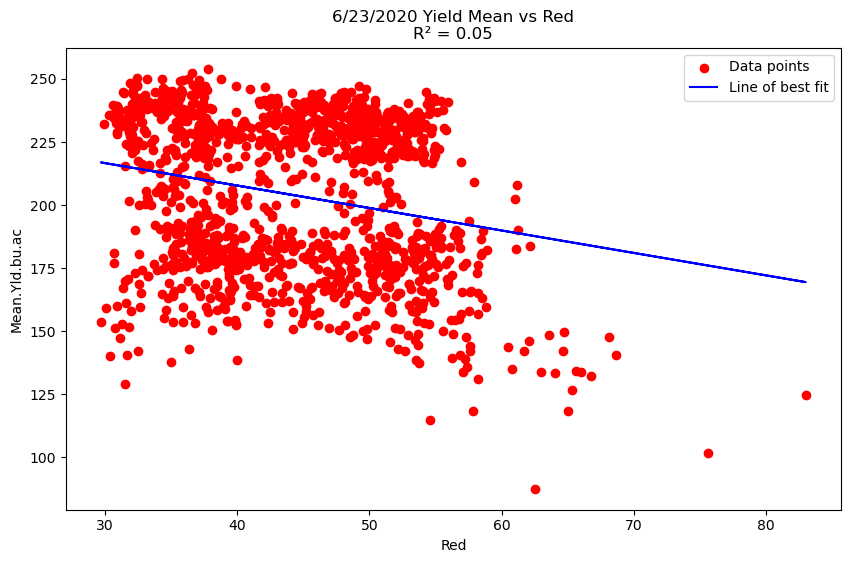

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_red, y_yld_mean, color='red', label='Data points')
plt.plot(X_red, reg_red.predict(X_red), color='blue', label='Line of best fit')
plt.xlabel('Red')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'6/23/2020 Yield Mean vs Red\nR² = {r2_red:.2f}')
plt.legend()
#plt.savefig('red_vs_d_yld_mean_6_23_2022.pdf')
plt.show()

In [22]:
X_gre = green_mean_cols['Green'].values.reshape(-1, 1)
y_yld_mean = green_mean_cols['Mean.Yld.bu.ac']

reg_gre = LinearRegression()
reg_gre.fit(X_gre, y_yld_mean)

LinearRegression()

In [23]:
r2_gre = reg_gre.score(X_gre, y_yld_mean)
r2_gre

0.02985864837252017

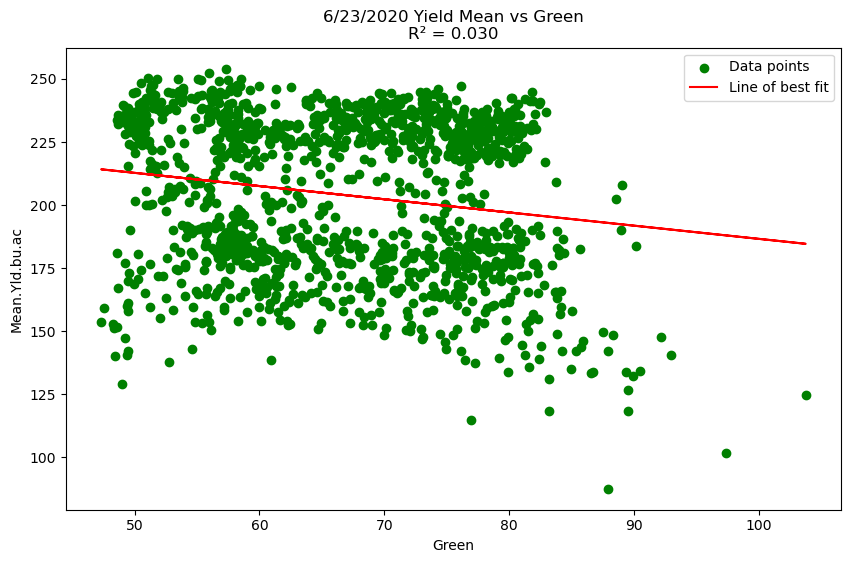

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_gre, y_yld_mean, color='green', label='Data points')
plt.plot(X_gre, reg_gre.predict(X_gre), color='red', label='Line of best fit')
plt.xlabel('Green')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'6/23/2020 Yield Mean vs Green\nR² = {r2_gre:.3f}')
plt.legend()
#plt.savefig('green_vs_d_yld_mean_6_23_2022.pdf')
plt.show()

In [25]:
X_blu = blue_mean_cols['Blue'].values.reshape(-1, 1)
y_yld_mean = blue_mean_cols['Mean.Yld.bu.ac']

reg_blu = LinearRegression()
reg_blu.fit(X_blu, y_yld_mean)

LinearRegression()

In [26]:
r2_blu = reg_blu.score(X_blu, y_yld_mean)
r2_blu

0.04312705119910587

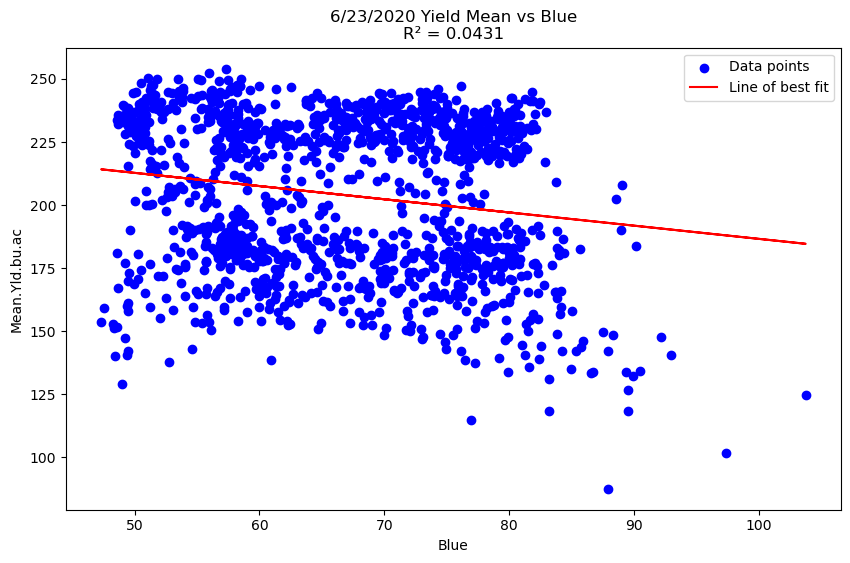

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_gre, y_yld_mean, color='blue', label='Data points')
plt.plot(X_gre, reg_gre.predict(X_gre), color='red', label='Line of best fit')
plt.xlabel('Blue')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'6/23/2020 Yield Mean vs Blue\nR² = {r2_blu:.4f}')
plt.legend()
#plt.savefig('blu_vs_d_yld_mean_6_23_2022.pdf')
plt.show()

In [28]:
X_bi = bi_mean_cols['BI'].values.reshape(-1, 1)
y_yld_mean = bi_mean_cols['Mean.Yld.bu.ac']

reg_bi = LinearRegression()
reg_bi.fit(X_bi, y_yld_mean)

LinearRegression()

In [29]:
r2_bi = reg_bi.score(X_bi, y_yld_mean)
r2_bi

0.03805992281961601

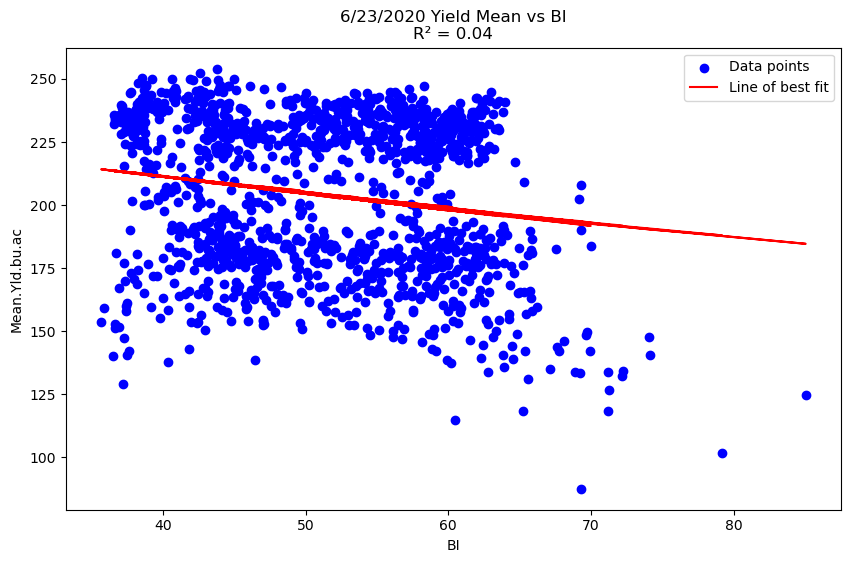

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_bi, y_yld_mean, color='blue', label='Data points')
plt.plot(X_bi, reg_gre.predict(X_gre), color='red', label='Line of best fit')
plt.xlabel('BI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'6/23/2020 Yield Mean vs BI\nR² = {r2_bi:.2f}')
plt.legend()
#plt.savefig('bi_vs_d_yld_mean_6_23_2022.pdf')
plt.show()